In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

In [2]:
learning_rate=0.055
epochs=1000
device="cpu"
n=3
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=1+x+1/2*x**2+1/6*x**3+0.5*torch.randn(x.size())
loss_record=list()

In [3]:
class Net(nn.Module):
    def __init__(self,n):
        super(Net,self).__init__()
        self.fc=nn.Linear(n,1)
    def forward(self,x):
        result=self.fc(x)
        return result
model=Net(n).to(device)
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)
scheduler=StepLR(optimizer,step_size=50,gamma=0.8)

In [4]:
def train(model,device,data,target,n,epoch,optimizer):
    model.train()
    data_ready=torch.cat([data**i for i in range(1,n+1)],1)
    data_ready,target=data_ready.to(device),target.to(device)
    result=model(data_ready)
    optimizer.zero_grad()
    train_loss=criterion(result,target)
    train_loss.backward()
    optimizer.step()
    if (epoch+1)%10==0 :
        loss_record.append(train_loss.item())
        print('Train Epoch{}: Loss:{:.6f}'.format(epoch+1,train_loss.item()))
def test(model,device,data,target):
    model.eval()
    data_ready=torch.cat([data**i for i in range(1,n+1)],1)
    data_ready,target=data_ready.to(device),target.to(device)
    result=model(data_ready)
    plt.figure()
    plt.scatter(data,target,color="#ff0000",label="data")
    plt.plot(data,result.detach(),color="#66ccff",label="line")
    plt.legend()
    plt.show()
    print(list(model.named_parameters()))
    plt.figure()
    x_draw=np.arange(1,epochs/10+1,1)
    plt.plot(x_draw,loss_record,color="#ff0000",label="loss")
    plt.legend()
    plt.show()

Train Epoch10: Loss:0.710978
Train Epoch20: Loss:0.350845
Train Epoch30: Loss:0.276549
Train Epoch40: Loss:0.252573
Train Epoch50: Loss:0.242782
Train Epoch60: Loss:0.238604
Train Epoch70: Loss:0.235953
Train Epoch80: Loss:0.234020
Train Epoch90: Loss:0.232501
Train Epoch100: Loss:0.231251
Train Epoch110: Loss:0.230375
Train Epoch120: Loss:0.229623
Train Epoch130: Loss:0.228958
Train Epoch140: Loss:0.228367
Train Epoch150: Loss:0.227841
Train Epoch160: Loss:0.227454
Train Epoch170: Loss:0.227109
Train Epoch180: Loss:0.226795
Train Epoch190: Loss:0.226508
Train Epoch200: Loss:0.226247
Train Epoch210: Loss:0.226050
Train Epoch220: Loss:0.225871
Train Epoch230: Loss:0.225705
Train Epoch240: Loss:0.225550
Train Epoch250: Loss:0.225406
Train Epoch260: Loss:0.225296
Train Epoch270: Loss:0.225195
Train Epoch280: Loss:0.225099
Train Epoch290: Loss:0.225009
Train Epoch300: Loss:0.224923
Train Epoch310: Loss:0.224857
Train Epoch320: Loss:0.224795
Train Epoch330: Loss:0.224736
Train Epoch340: Los

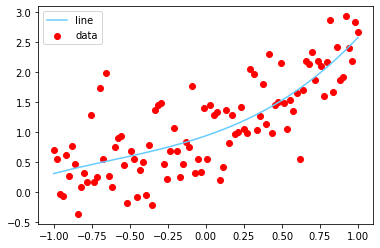

[('fc.weight', Parameter containing:
tensor([[0.8643, 0.5036, 0.2680]], requires_grad=True)), ('fc.bias', Parameter containing:
tensor([0.9377], requires_grad=True))]


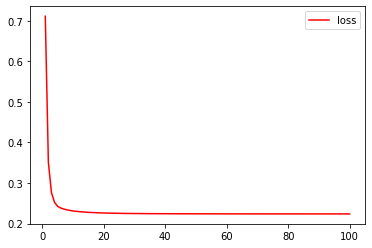

In [5]:
for epoch in range(epochs):
    train(model,device,x,y,n,epoch,optimizer)
    scheduler.step()
test(model,device,x,y)